# Capstone: Supervised Learning

## Instructions: 

First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

Please execute the three tasks above in a Jupyter notebook that you will submit to the grading team below.

Next, in order to prepare for your presentation, create a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

    A specified research question your model addresses
    How you chose your model specification and what alternatives you compared it to
    The practical uses of your model for an audience of interest
    Any weak points or shortcomings of your model

This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of all your work so far on supervised learning. As a secondary matter, your slides and the Jupyter notebook should be worthy of inclusion as examples of your work product when applying to jobs.

Supervised Learning Capstone Presentation Details:

Next, in order to prepare for your presentation, create a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

    A specified research question your model addresses
    How you chose your model specification and what alternatives you compared it to
    The practical uses of your model for an audience of interest
    Any weak points or shortcomings of your model

This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of all your work so far on supervised learning. As a secondary matter, your slides and the Jupyter notebook should be worthy of inclusion as examples of your work product when applying to jobs.

    You should have a slide deck and 15 minute presentation that guides your assessor through the different models you tried and be able to speak to the best performing model and why it’s the best performing model.

    The presentation flow should be

        A quick intro about the context/topic of the project

        Information on the data (where it came from, how it was obtained, missingness, quick stats on the data, etc)

        A specified research question your model addresses

        How you chose your model specification and what alternatives you compared it to

        The practical uses of your model for an audience of interest

        Any weak points or shortcomings of your model

    After the presentation there will be a 5-10 min Q&A where other students and mentors can ask questions about your project.  So make sure you really understand the data and modelling you used!

## Data Source and information

data source: https://healthdata.gov/dataset/hospital-readmission-reduction/resource/f3830eb1-2d22-496c-b663-46b54e175d9f

https://healthdata.gov/dataset/hospital-readmission-reduction

In October 2012, CMS began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

https://data.medicare.gov/data/hospital-compare
Hospital Compare is a consumer-oriented website that provides information on the quality of care hospitals are providing to their patients. This information can help consumers make informed decisions about health care. Hospital Compare allows consumers to select multiple hospitals and directly compare performance measure information related to heart attack, emergency department care, preventive care, stroke care, and other conditions. The Centers for Medicare & Medicaid Services (CMS) created the Hospital Compare website to better inform health care consumers about a hospital’s quality of care. Hospital Compare provides data on over 4,000 Medicare-certified hospitals, including acute care hospitals, critical access hospitals (CAHs), children’s hospitals, Veterans Health Administration (VHA) Medical Centers, and hospital outpatient departments. Hospital Compare is part of an Administration-wide effort to increase the availability and accessibility of information on quality, utilization, and costs for effective, informed decision-making. More information about Hospital Compare can be found by visiting the CMS.gov website and performing a search for Hospital Compare. To access the Hospital Compare website, please visit www.medicare.gov/hospitalcompare. 

https://www.medicare.gov/hospitalcompare/Data/Data-Updated.html#%20
measures & current data period

## https://www.medicare.gov/hospitalcompare/Data/Hospital-overall-ratings-calculation.html

hospital compare overall hospital rating
n = 4,573
distribution of stars (N/A, 1-5)

The methodology uses a statistical model known as a latent variable model. Seven different latent variable models are used to calculate scores for 7 groups of measures.
Mortality
Safety of Care
Readmission
Patient Experience
Effectiveness of Care
Timeliness of Care
Efficient Use of Medical Imaging

A hospital summary score is then calculated by taking the weighted average of these group scores. If a hospital is missing a measure category or group, the weights are redistributed amongst the qualifying measure categories or groups.
Finally, the overall hospital rating is calculated using the hospital summary score.

## additional data
https://www.cdc.gov/nchs/data_access/urban_rural.htm#Data_Files_and_Documentation
https://www.cdc.gov/nchs/data/data_acces_files/NCHSURCodes2013.xlsx
https://www.cdc.gov/nchs/data/series/sr_02/sr02_166.pdf

TheNationalCenterforHealthStatistics’(NCHS)Urban–RuralClassificationSchemeforCounties
metropolitanstatisticalareas(MSAs)

For ZIP to FIP look up
https://data.world/niccolley/us-zipcode-to-county-state/workspace/file?filename=ZIP-COUNTY-FIPS_2018-03.csv

## Load data files

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
unplan_readm_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\unplan_hosp_readm.csv')

In [3]:
readm_red_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\hosp_readm_reduct_prog.csv')

In [4]:
mort_meas_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\hosp_mortality_measures.csv')

In [5]:
hcahps_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\hcahps_ratings.csv')

In [6]:
gen_info_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\hosp_gen_info.csv')

## Cleaning data
clean data for each file individually prior to merging dataframes into one file for modeling

### reduce each file to relevant data only,  address missing values, convert to numeric, dummy categorical values

In [7]:
unplan_readm_df.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Hospital return days for heart attack patients,EDAC_30_AMI,Average Days per 100 Discharges,742,-0.8,-11.6,10.6,NaN,7/1/2015,6/30/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Hospital return days for heart failure patients,EDAC_30_HF,More Days Than Average per 100 Discharges,1114,17.8,4.5,31.5,NaN,7/1/2015,6/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Hospital return days for pneumonia patients,EDAC_30_PN,Average Days per 100 Discharges,604,-7.8,-21.3,6,NaN,7/1/2015,6/30/2018


In [8]:
unplan_readm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54093 entries, 0 to 54092
Data columns (total 18 columns):
Provider ID             54093 non-null object
Hospital Name           54093 non-null object
Address                 54093 non-null object
City                    54093 non-null object
State                   54093 non-null object
ZIP Code                54093 non-null int64
County Name             54093 non-null object
Phone Number            54093 non-null int64
Measure Name            54093 non-null object
Measure ID              54093 non-null object
Compared to National    54093 non-null object
Denominator             54093 non-null object
Score                   54093 non-null object
Lower Estimate          54093 non-null object
Higher Estimate         54093 non-null object
Footnote                19755 non-null object
Measure Start Date      54093 non-null object
Measure End Date        54093 non-null object
dtypes: int64(2), object(16)
memory usage: 7.4+ MB


In [9]:
#drop unnecessary columns
unplan_readm_df = unplan_readm_df.drop(['Address', 'City', 'County Name', 'Phone Number', 'Measure Name', 'Footnote', 'Measure Start Date', 'Measure End Date'], axis=1)

In [10]:
#drop all unnecessary Measure IDs, keep only HF
unplan_readm_df['Measure ID'].unique()

array(['EDAC_30_AMI', 'EDAC_30_HF', 'EDAC_30_PN', 'OP_32', 'READM_30_AMI',
       'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF',
       'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN'],
      dtype=object)

In [11]:
#drop all but HF values
unplan_readm_df = unplan_readm_df[unplan_readm_df['Measure ID'].isin(['READM_30_HF'])] 
unplan_readm_df.head(3)

,Provider ID,Hospital Name,State,ZIP Code,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate
7,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,READM_30_HF,No Different Than the National Rate,1114,22.6,20.5,24.8
18,10005,MARSHALL MEDICAL CENTER SOUTH,AL,35957,READM_30_HF,No Different Than the National Rate,341,21.3,18.2,24.9
29,10006,NORTH ALABAMA MEDICAL CENTER,AL,35630,READM_30_HF,No Different Than the National Rate,793,20.4,18.1,22.9


In [12]:
#change name of Measure ID columns to identify the original df and measure
unplan_readm_df.rename(columns={'Measure ID':'READM_30_HF'}, inplace=True)

In [13]:
#change value of 'READM_30_HF' to numeric
unplan_readm_df.loc[unplan_readm_df.READM_30_HF == 'READM_30_HF', 'READM_30_HF'] = 1

In [14]:
unplan_readm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 7 to 54089
Data columns (total 10 columns):
Provider ID             4930 non-null object
Hospital Name           4930 non-null object
State                   4930 non-null object
ZIP Code                4930 non-null int64
READM_30_HF             4930 non-null int64
Compared to National    4930 non-null object
Denominator             4930 non-null object
Score                   4930 non-null object
Lower Estimate          4930 non-null object
Higher Estimate         4930 non-null object
dtypes: int64(2), object(8)
memory usage: 423.7+ KB


In [15]:
unplan_readm_df.head(3)

,Provider ID,Hospital Name,State,ZIP Code,READM_30_HF,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate
7,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,1,No Different Than the National Rate,1114,22.6,20.5,24.8
18,10005,MARSHALL MEDICAL CENTER SOUTH,AL,35957,1,No Different Than the National Rate,341,21.3,18.2,24.9
29,10006,NORTH ALABAMA MEDICAL CENTER,AL,35630,1,No Different Than the National Rate,793,20.4,18.1,22.9


In [16]:
unplan_readm_df.isnull().sum()

Provider ID             0
Hospital Name           0
State                   0
ZIP Code                0
READM_30_HF             0
Compared to National    0
Denominator             0
Score                   0
Lower Estimate          0
Higher Estimate         0
dtype: int64

In [17]:
unplan_readm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 7 to 54089
Data columns (total 10 columns):
Provider ID             4930 non-null object
Hospital Name           4930 non-null object
State                   4930 non-null object
ZIP Code                4930 non-null int64
READM_30_HF             4930 non-null int64
Compared to National    4930 non-null object
Denominator             4930 non-null object
Score                   4930 non-null object
Lower Estimate          4930 non-null object
Higher Estimate         4930 non-null object
dtypes: int64(2), object(8)
memory usage: 423.7+ KB


In [18]:
#convert to numeric
cols = ['Provider ID', 'Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']
unplan_readm_df[cols] = unplan_readm_df[cols].apply(pd.to_numeric, errors = 'coerce', downcast = 'float')

In [19]:
cols = unplan_readm_df.columns[unplan_readm_df.columns.isin(['Denominator','Score', 'Lower Estimate', 'Higher Estimate', 'Compared to National'])]
unplan_readm_df.rename(columns = dict(zip(cols, cols + '_30d_readm')), inplace=True)

In [20]:
unplan_readm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 7 to 54089
Data columns (total 10 columns):
Provider ID                       4758 non-null float32
Hospital Name                     4930 non-null object
State                             4930 non-null object
ZIP Code                          4930 non-null int64
READM_30_HF                       4930 non-null int64
Compared to National_30d_readm    4930 non-null object
Denominator_30d_readm             3692 non-null float32
Score_30d_readm                   3692 non-null float32
Lower Estimate_30d_readm          3692 non-null float32
Higher Estimate_30d_readm         3692 non-null float32
dtypes: float32(5), int64(2), object(3)
memory usage: 327.4+ KB


In [21]:
unplan_readm_df['Compared to National_30d_readm'].unique()

array(['No Different Than the National Rate', 'Number of Cases Too Small',
       'Not Available', 'Worse Than the National Rate',
       'Better Than the National Rate'], dtype=object)

In [22]:
unplan_readm_df = pd.concat([unplan_readm_df, pd.get_dummies(unplan_readm_df['Compared to National_30d_readm'], prefix='comp_nat_30d_readm', drop_first=True)], axis =1)

In [23]:
unplan_readm_df = unplan_readm_df.drop(['Compared to National_30d_readm'], axis=1)

In [24]:
unplan_readm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 7 to 54089
Data columns (total 13 columns):
Provider ID                                               4758 non-null float32
Hospital Name                                             4930 non-null object
State                                                     4930 non-null object
ZIP Code                                                  4930 non-null int64
READM_30_HF                                               4930 non-null int64
Denominator_30d_readm                                     3692 non-null float32
Score_30d_readm                                           3692 non-null float32
Lower Estimate_30d_readm                                  3692 non-null float32
Higher Estimate_30d_readm                                 3692 non-null float32
comp_nat_30d_readm_No Different Than the National Rate    4930 non-null uint8
comp_nat_30d_readm_Not Available                          4930 non-null uint8
comp_nat_30d_readm_Num

In [25]:
readm_red_df.head(3)

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_AMI_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,7/1/2014,6/30/2017
1,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_CABG_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,7/1/2014,6/30/2017
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,7/1/2014,6/30/2017


In [26]:
readm_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
Hospital Name                 19674 non-null object
Provider ID                   19674 non-null int64
State                         19674 non-null object
Measure Name                  19674 non-null object
Number of Discharges          19674 non-null object
Footnote                      8157 non-null object
Excess Readmission Ratio      19674 non-null object
Predicted Readmission Rate    19674 non-null object
Expected Readmission Rate     19674 non-null object
Number of Readmissions        19674 non-null object
Start Date                    19674 non-null object
End Date                      19674 non-null object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


In [27]:
#drop unnecessary columns
readm_red_df = readm_red_df.drop(['Footnote', 'Start Date', 'End Date'], axis=1)

In [28]:
readm_red_df['Measure Name'].unique()

array(['READM_30_AMI_HRRP', 'READM_30_CABG_HRRP', 'READM_30_COPD_HRRP',
       'READM_30_HF_HRRP', 'READM_30_HIP_KNEE_HRRP', 'READM_30_PN_HRRP'],
      dtype=object)

In [29]:
#drop all but HF values
readm_red_df = readm_red_df[readm_red_df['Measure Name'].isin(['READM_30_HF_HRRP'])] 
readm_red_df.head(3)

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,1.0773,23.9788,22.2578,67
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HF_HRRP,75,0.9726,19.6816,20.2355,13
15,HARMON HOSPITAL,290042,NV,READM_30_HF_HRRP,Not Available,Not Available,Not Available,Not Available,Not Available


In [30]:
#change name of Measure ID columns to identify the original df and measure
readm_red_df.rename(columns={'Measure Name':'READM_30_HF_HRRP'}, inplace=True)

In [31]:
#change value of READM_30_HF_HRRP to numeric
readm_red_df.loc[readm_red_df.READM_30_HF_HRRP == 'READM_30_HF_HRRP', 'READM_30_HF_HRRP'] = 1

In [32]:
readm_red_df.head(3)

,Hospital Name,Provider ID,State,READM_30_HF_HRRP,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
3,BYRD REGIONAL HOSPITAL,190164,LA,1,259,1.0773,23.9788,22.2578,67
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,1,75,0.9726,19.6816,20.2355,13
15,HARMON HOSPITAL,290042,NV,1,Not Available,Not Available,Not Available,Not Available,Not Available


In [33]:
readm_red_df.isnull().sum()

Hospital Name                 0
Provider ID                   0
State                         0
READM_30_HF_HRRP              0
Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
dtype: int64

In [34]:
readm_red_df = readm_red_df.applymap(lambda elem: float('NaN') if elem == "Not Available" else elem)

In [35]:
readm_red_df.isnull().sum()

Hospital Name                   0
Provider ID                     0
State                           0
READM_30_HF_HRRP                0
Number of Discharges          602
Excess Readmission Ratio      397
Predicted Readmission Rate    397
Expected Readmission Rate     397
Number of Readmissions        609
dtype: int64

In [36]:
readm_red_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3279 entries, 3 to 19671
Data columns (total 9 columns):
Hospital Name                 3279 non-null object
Provider ID                   3279 non-null int64
State                         3279 non-null object
READM_30_HF_HRRP              3279 non-null int64
Number of Discharges          2677 non-null object
Excess Readmission Ratio      2882 non-null object
Predicted Readmission Rate    2882 non-null object
Expected Readmission Rate     2882 non-null object
Number of Readmissions        2670 non-null object
dtypes: int64(2), object(7)
memory usage: 256.2+ KB


In [37]:
cols = ['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions']
readm_red_df[cols] = readm_red_df[cols].apply(pd.to_numeric, errors = 'coerce', downcast = 'float')

In [38]:
readm_red_df.head(3)

,Hospital Name,Provider ID,State,READM_30_HF_HRRP,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
3,BYRD REGIONAL HOSPITAL,190164,LA,1,259.0,1.0773,23.978800,22.257799,67.0
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,1,75.0,0.9726,19.681601,20.235500,13.0
15,HARMON HOSPITAL,290042,NV,1,NaN,NaN,NaN,NaN,NaN


### creating  additional feature = target
Excess Readmission Ratio: represents Hospital's "predicted" number of readmissions compared to CMS "expected" number of readmissions. 

Calculate the **Actual Readmission Rate** = 'actual_rrate' (number of readmissions/discharges)

Calculate the **Actual Readmission Ratio** = 'actual_rratio' ('actual_rrate'/'Expected Readmission Rate') in order to compare the Excess Readmission Ratio

target = 'actual_rratio'

In [39]:
readm_red_df['actual_rrate'] = readm_red_df['Number of Readmissions']/readm_red_df['Number of Discharges'] * 100

In [40]:
readm_red_df['actual_rratio'] = readm_red_df['actual_rrate']/readm_red_df['Expected Readmission Rate']

In [41]:
readm_red_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3279 entries, 3 to 19671
Data columns (total 11 columns):
Hospital Name                 3279 non-null object
Provider ID                   3279 non-null int64
State                         3279 non-null object
READM_30_HF_HRRP              3279 non-null int64
Number of Discharges          2677 non-null float32
Excess Readmission Ratio      2882 non-null float32
Predicted Readmission Rate    2882 non-null float32
Expected Readmission Rate     2882 non-null float32
Number of Readmissions        2670 non-null float32
actual_rrate                  2670 non-null float32
actual_rratio                 2670 non-null float32
dtypes: float32(7), int64(2), object(2)
memory usage: 217.7+ KB


In [42]:
cols = readm_red_df.columns[readm_red_df.columns.isin(['Number of Discharges','Excess Readmission Ratio', 
                                                       'Predicted Readmission Rate', 'Expected Readmission Rate', 
                                                       'Number of Readmissions', 'actual_rrate', 'actual_rratio'])]
readm_red_df.rename(columns = dict(zip(cols, cols + '_30d_HRRP')), inplace=True)

In [43]:
readm_red_df.isnull().sum()

Hospital Name                            0
Provider ID                              0
State                                    0
READM_30_HF_HRRP                         0
Number of Discharges_30d_HRRP          602
Excess Readmission Ratio_30d_HRRP      397
Predicted Readmission Rate_30d_HRRP    397
Expected Readmission Rate_30d_HRRP     397
Number of Readmissions_30d_HRRP        609
actual_rrate_30d_HRRP                  609
actual_rratio_30d_HRRP                 609
dtype: int64

In [44]:
mort_meas_df.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different Than the National Rate,292,3.2,2.1,4.8,NaN,4/1/2015,3/31/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for heart attack patients,MORT_30_AMI,No Different Than the National Rate,688,13,11,15.5,NaN,7/1/2015,6/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG surgery patients,MORT_30_CABG,No Different Than the National Rate,291,4.3,2.6,6.8,NaN,7/1/2015,6/30/2018


In [45]:
mort_meas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91889 entries, 0 to 91888
Data columns (total 18 columns):
Provider ID             91889 non-null object
Hospital Name           91889 non-null object
Address                 91889 non-null object
City                    91889 non-null object
State                   91889 non-null object
ZIP Code                91889 non-null int64
County Name             91889 non-null object
Phone Number            91889 non-null int64
Measure Name            91889 non-null object
Measure ID              91889 non-null object
Compared to National    91889 non-null object
Denominator             91889 non-null object
Score                   91889 non-null object
Lower Estimate          91889 non-null object
Higher Estimate         91889 non-null object
Footnote                37628 non-null object
Measure Start Date      91889 non-null object
Measure End Date        91889 non-null object
dtypes: int64(2), object(16)
memory usage: 12.6+ MB


In [46]:
mort_meas_df = mort_meas_df.drop(['Address', 'City', 'County Name', 'Phone Number', 'Measure Name', 'Footnote', 'Measure Start Date', 'Measure End Date'], axis=1)

In [47]:
mort_meas_df['Measure ID'].unique()

array(['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_10_POST_KIDNEY',
       'PSI_11_POST_RESP', 'PSI_12_POSTOP_PULMEMB_DVT',
       'PSI_13_POST_SEPSIS', 'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC',
       'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX',
       'PSI_8_POST_HIP', 'PSI_90_SAFETY', 'PSI_9_POST_HEM'], dtype=object)

In [48]:
#drop all but HF values
mort_meas_df = mort_meas_df[mort_meas_df['Measure ID'].isin(['MORT_30_HF'])] 
mort_meas_df.head(3)

,Provider ID,Hospital Name,State,ZIP Code,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,MORT_30_HF,No Different Than the National Rate,869,12.7,10.7,15
23,10005,MARSHALL MEDICAL CENTER SOUTH,AL,35957,MORT_30_HF,No Different Than the National Rate,318,14.4,11.4,17.9
42,10006,NORTH ALABAMA MEDICAL CENTER,AL,35630,MORT_30_HF,No Different Than the National Rate,671,12.9,10.6,15.4


In [49]:
#change name of Measure ID columns to identify the original df and measure
mort_meas_df.rename(columns={'Measure ID':'MORT_30_HF'}, inplace=True)

In [50]:
#change value of MORT_30_HF to numeric
mort_meas_df.loc[mort_meas_df.MORT_30_HF == 'MORT_30_HF', 'MORT_30_HF'] = 1

In [51]:
cols = ['Provider ID', 'Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']
mort_meas_df[cols] = mort_meas_df[cols].apply(pd.to_numeric, errors = 'coerce', downcast = 'float')

In [52]:
mort_meas_df['Compared to National'].unique()

array(['No Different Than the National Rate', 'Not Available',
       'Number of Cases Too Small', 'Better Than the National Rate',
       'Worse Than the National Rate'], dtype=object)

In [53]:
mort_meas_df = pd.concat([mort_meas_df, pd.get_dummies(mort_meas_df['Compared to National'], prefix='nat_comp_30d_mort', drop_first=True)], axis =1)

In [54]:
mort_meas_df.head(3)

,Provider ID,Hospital Name,State,ZIP Code,MORT_30_HF,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,nat_comp_30d_mort_No Different Than the National Rate,nat_comp_30d_mort_Not Available,nat_comp_30d_mort_Number of Cases Too Small,nat_comp_30d_mort_Worse Than the National Rate
4,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,1,No Different Than the National Rate,869.0,12.7,10.7,15.0,1,0,0,0
23,10005.0,MARSHALL MEDICAL CENTER SOUTH,AL,35957,1,No Different Than the National Rate,318.0,14.4,11.4,17.9,1,0,0,0
42,10006.0,NORTH ALABAMA MEDICAL CENTER,AL,35630,1,No Different Than the National Rate,671.0,12.9,10.6,15.4,1,0,0,0


In [55]:
mort_meas_df = mort_meas_df.drop(['Compared to National'], axis=1)

In [56]:
mort_meas_df.isnull().sum()

Provider ID                                               172
Hospital Name                                               0
State                                                       0
ZIP Code                                                    0
MORT_30_HF                                                  0
Denominator                                              1313
Score                                                    1313
Lower Estimate                                           1313
Higher Estimate                                          1313
nat_comp_30d_mort_No Different Than the National Rate       0
nat_comp_30d_mort_Not Available                             0
nat_comp_30d_mort_Number of Cases Too Small                 0
nat_comp_30d_mort_Worse Than the National Rate              0
dtype: int64

In [57]:
cols = mort_meas_df.columns[mort_meas_df.columns.isin(['Denominator','Score', 'Lower Estimate', 'Higher Estimate'])]
mort_meas_df.rename(columns = dict(zip(cols, cols + '_30d_mort')), inplace=True)

In [58]:
mort_meas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 4 to 91874
Data columns (total 13 columns):
Provider ID                                              4758 non-null float32
Hospital Name                                            4930 non-null object
State                                                    4930 non-null object
ZIP Code                                                 4930 non-null int64
MORT_30_HF                                               4930 non-null int64
Denominator_30d_mort                                     3617 non-null float32
Score_30d_mort                                           3617 non-null float32
Lower Estimate_30d_mort                                  3617 non-null float32
Higher Estimate_30d_mort                                 3617 non-null float32
nat_comp_30d_mort_No Different Than the National Rate    4930 non-null uint8
nat_comp_30d_mort_Not Available                          4930 non-null uint8
nat_comp_30d_mort_Number of Cases

In [59]:
hcahps_df.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,72,NaN,Not Applicable,526,NaN,21,NaN,10/1/2017,9/30/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,9,NaN,Not Applicable,526,NaN,21,NaN,10/1/2017,9/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,19,NaN,Not Applicable,526,NaN,21,NaN,10/1/2017,9/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,Not Applicable,NaN,87,526,NaN,21,NaN,10/1/2017,9/30/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,Not Applicable,NaN,Not Applicable,526,NaN,21,NaN,10/1/2017,9/30/2018


In [60]:
hcahps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455235 entries, 0 to 455234
Data columns (total 22 columns):
Provider ID                              455235 non-null object
Hospital Name                            455235 non-null object
Address                                  455235 non-null object
City                                     455235 non-null object
State                                    455235 non-null object
ZIP Code                                 455235 non-null int64
County Name                              455235 non-null object
Phone Number                             455235 non-null int64
HCAHPS Measure ID                        455235 non-null object
HCAHPS Question                          455235 non-null object
HCAHPS Answer Description                455235 non-null object
Patient Survey Star Rating               455235 non-null object
Patient Survey Star Rating Footnote      15103 non-null object
HCAHPS Answer Percent                    455235 non-null obj

In [61]:
hcahps_df = hcahps_df.drop(['Address', 'City', 'County Name', 'Phone Number', 'HCAHPS Answer Percent Footnote',
              'Patient Survey Star Rating Footnote', 'Number of Completed Surveys Footnote',
              'Survey Response Rate Percent Footnote', 'Measure Start Date', 'Measure End Date'], axis=1)

#### unable to use dataset without significant wrangling due to current structure; 
will use only patient star rating and HCAHPS linear mean value as features at this time

In [62]:
cols = ['Patient Survey Star Rating', 'HCAHPS Linear Mean Value']
hcahps_df[cols] = hcahps_df[cols].apply(pd.to_numeric, errors = 'coerce', downcast = 'float')

In [63]:
hcahps_df = hcahps_df.loc[(hcahps_df['Patient Survey Star Rating'] >0) | 
                          (hcahps_df['HCAHPS Linear Mean Value'] >0)] 

In [64]:
hcahps_df.head()

,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,NaN,Not Applicable,87.0,526,21
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,2.0,Not Applicable,NaN,526,21
17,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_2_LINEAR_SCORE,Doctor communication - linear mean score,Doctor communication - linear mean score,NaN,Not Applicable,90.0,526,21
18,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_2_STAR_RATING,Doctor communication - star rating,Doctor communication - star rating,3.0,Not Applicable,NaN,526,21
31,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_3_LINEAR_SCORE,Staff responsiveness - linear mean score,Staff responsiveness - linear mean score,NaN,Not Applicable,76.0,526,21


In [65]:
hcahps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73962 entries, 3 to 454955
Data columns (total 12 columns):
Provider ID                     73962 non-null object
Hospital Name                   73962 non-null object
State                           73962 non-null object
ZIP Code                        73962 non-null int64
HCAHPS Measure ID               73962 non-null object
HCAHPS Question                 73962 non-null object
HCAHPS Answer Description       73962 non-null object
Patient Survey Star Rating      38742 non-null float32
HCAHPS Answer Percent           73962 non-null object
HCAHPS Linear Mean Value        35220 non-null float32
Number of Completed Surveys     73962 non-null object
Survey Response Rate Percent    73962 non-null object
dtypes: float32(2), int64(1), object(9)
memory usage: 6.8+ MB


In [66]:
hcahps_df['HCAHPS Measure ID'].unique()

array(['H_COMP_1_LINEAR_SCORE', 'H_COMP_1_STAR_RATING',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_2_STAR_RATING',
       'H_COMP_3_LINEAR_SCORE', 'H_COMP_3_STAR_RATING',
       'H_COMP_5_LINEAR_SCORE', 'H_COMP_5_STAR_RATING',
       'H_COMP_6_LINEAR_SCORE', 'H_COMP_6_STAR_RATING',
       'H_COMP_7_LINEAR_SCORE', 'H_COMP_7_STAR_RATING',
       'H_CLEAN_LINEAR_SCORE', 'H_CLEAN_STAR_RATING',
       'H_QUIET_LINEAR_SCORE', 'H_QUIET_STAR_RATING',
       'H_HSP_RATING_LINEAR_SCORE', 'H_HSP_RATING_STAR_RATING',
       'H_RECMND_LINEAR_SCORE', 'H_RECMND_STAR_RATING', 'H_STAR_RATING'],
      dtype=object)

In [67]:
#drop all but likely correlated values
hcahps_df = hcahps_df[hcahps_df['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE', 'H_COMP_1_STAR_RATING',
                                                           'H_COMP_2_LINEAR_SCORE', 'H_COMP_2_STAR_RATING', 
                                                           'H_COMP_5_LINEAR_SCORE', 'H_COMP_5_STAR_RATING',
                                                           'H_COMP_6_LINEAR_SCORE', 'H_COMP_6_STAR_RATING',
                                                           'H_COMP_7_LINEAR_SCORE', 'H_COMP_7_STAR_RATING', 
                                                           'H_HSP_RATING_LINEAR_SCORE', 'H_HSP_RATING_STAR_RATING',
                                                           'H_RECMND_LINEAR_SCORE', 'H_RECMND_STAR_RATING', 
                                                           'H_STAR_RATING'])] 

In [68]:
hcahps_df = hcahps_df.drop(['HCAHPS Question', 'HCAHPS Answer Percent', 'Survey Response Rate Percent', 'Number of Completed Surveys'], axis=1)

In [69]:
hcahps_df['Provider ID'] = hcahps_df['Provider ID'].apply(pd.to_numeric, errors = 'coerce', downcast = 'integer')

In [70]:
hcahps_df.head(5)

,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Measure ID,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Linear Mean Value
3,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,NaN,87.0
4,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_1_STAR_RATING,Nurse communication - star rating,2.0,NaN
17,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_2_LINEAR_SCORE,Doctor communication - linear mean score,NaN,90.0
18,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_2_STAR_RATING,Doctor communication - star rating,3.0,NaN
42,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_5_LINEAR_SCORE,Communication about medicines - linear mean score,NaN,71.0


In [71]:
hcahps_df.isnull().sum()

Provider ID                    1740
Hospital Name                     0
State                             0
ZIP Code                          0
HCAHPS Measure ID                 0
HCAHPS Answer Description         0
Patient Survey Star Rating    24654
HCAHPS Linear Mean Value      28176
dtype: int64

In [72]:
#will fill missing Patient Survey Star Rating & HCAHPS Linear Mean Value prior to merging with other dataframes to avoid
#filling in with values from other dataframes (due to bfill and ffill)
hcahps_df['HCAHPS Linear Mean Value'].fillna( method ='ffill', inplace = True) 

In [73]:
hcahps_df['Patient Survey Star Rating'].fillna( method ='bfill', inplace = True) 

In [74]:
hcahps_df.head()

,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Measure ID,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Linear Mean Value
3,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,2.0,87.0
4,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_1_STAR_RATING,Nurse communication - star rating,2.0,87.0
17,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_2_LINEAR_SCORE,Doctor communication - linear mean score,3.0,90.0
18,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_2_STAR_RATING,Doctor communication - star rating,3.0,90.0
42,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,H_COMP_5_LINEAR_SCORE,Communication about medicines - linear mean score,1.0,71.0


In [75]:
hcahps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52830 entries, 3 to 454955
Data columns (total 8 columns):
Provider ID                   51090 non-null float64
Hospital Name                 52830 non-null object
State                         52830 non-null object
ZIP Code                      52830 non-null int64
HCAHPS Measure ID             52830 non-null object
HCAHPS Answer Description     52830 non-null object
Patient Survey Star Rating    52830 non-null float32
HCAHPS Linear Mean Value      52830 non-null float32
dtypes: float32(2), float64(1), int64(1), object(4)
memory usage: 3.2+ MB


In [76]:
gen_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 28 columns):
Provider ID                                                      5334 non-null int64
Hospital Name                                                    5334 non-null object
Address                                                          5334 non-null object
City                                                             5334 non-null object
State                                                            5334 non-null object
ZIP Code                                                         5334 non-null int64
County Name                                                      5334 non-null object
Phone Number                                                     5334 non-null int64
Hospital Type                                                    5334 non-null object
Hospital Ownership                                               5334 non-null object
Emergency Services                  

In [77]:
gen_info_df.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN


In [78]:
gen_info_df = gen_info_df.drop(['Address', 'City', 'County Name', 'Phone Number', 'Hospital overall rating footnote',
                'Mortality national comparison footnote', 'Safety of care national comparison footnote',
                'Readmission national comparison footnote', 'Patient experience national comparison footnote',
                'Effectiveness of care national comparison footnote', 'Timeliness of care national comparison footnote',
                'Efficient use of medical imaging national comparison footnote'], axis=1)

In [79]:
#convert to dummies
dummy_list = ['Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for meaningful use of EHRs', 
'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 
'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 
'Efficient use of medical imaging national comparison']

In [80]:
for column in dummy_list:
    gen_info_df = pd.concat([gen_info_df,pd.get_dummies(gen_info_df[column], prefix=column, drop_first=True)], axis=1)


In [81]:
gen_info_df.head(3)

,Provider ID,Hospital Name,State,ZIP Code,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,...,Patient experience national comparison_Same as the national average,Effectiveness of care national comparison_Below the national average,Effectiveness of care national comparison_Not Available,Effectiveness of care national comparison_Same as the national average,Timeliness of care national comparison_Below the national average,Timeliness of care national comparison_Not Available,Timeliness of care national comparison_Same as the national average,Efficient use of medical imaging national comparison_Below the national average,Efficient use of medical imaging national comparison_Not Available,Efficient use of medical imaging national comparison_Same as the national average
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,...,0,0,0,1,0,0,0,0,0,1
1,10005,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,1,Below the national average,...,1,0,0,0,0,0,0,1,0,0
2,10006,NORTH ALABAMA MEDICAL CENTER,AL,35630,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Below the national average,...,0,0,0,1,0,0,0,1,0,0


In [82]:
gen_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 55 columns):
Provider ID                                                                          5334 non-null int64
Hospital Name                                                                        5334 non-null object
State                                                                                5334 non-null object
ZIP Code                                                                             5334 non-null int64
Hospital Type                                                                        5334 non-null object
Hospital Ownership                                                                   5334 non-null object
Emergency Services                                                                   5334 non-null object
Meets criteria for meaningful use of EHRs                                            3710 non-null object
Hospital overall rating                        

In [83]:
gen_info_df = gen_info_df.drop(['Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for meaningful use of EHRs', 
'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 
'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 
'Efficient use of medical imaging national comparison'], axis=1)

In [84]:
gen_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 43 columns):
Provider ID                                                                          5334 non-null int64
Hospital Name                                                                        5334 non-null object
State                                                                                5334 non-null object
ZIP Code                                                                             5334 non-null int64
Hospital Type_Childrens                                                              5334 non-null uint8
Hospital Type_Critical Access Hospitals                                              5334 non-null uint8
Hospital Type_Psychiatric                                                            5334 non-null uint8
Hospital Ownership_Government - Hospital District or Authority                       5334 non-null uint8
Hospital Ownership_Government - Local              

In [85]:
gen_info_df.isnull().sum()

Provider ID                                                                          0
Hospital Name                                                                        0
State                                                                                0
ZIP Code                                                                             0
Hospital Type_Childrens                                                              0
Hospital Type_Critical Access Hospitals                                              0
Hospital Type_Psychiatric                                                            0
Hospital Ownership_Government - Hospital District or Authority                       0
Hospital Ownership_Government - Local                                                0
Hospital Ownership_Government - State                                                0
Hospital Ownership_Physician                                                         0
Hospital Ownership_Proprietary             

#### original dataframe info:

**unplan_readm_df:** 54093 entries reduced to 4930, measure column name = READM_30_HF, value = 1, no null; 'Compared to National' with 5 possible values - dummy; 

**readm_red_df:** 19674 entries reduced to 2670, no ZIP code column, measure column name = READM_30_HF_HRRP, value = 1, nulls removed; 

**mort_meas_df:** 91889 entries reduced to 4930, measure column name =  MORT_30_HF, value = 1, 'Compared to National' with 5 possible values - dummy, missing 172 'Provider ID', missing 1331 each of Denominator, Score, Lower Estimate, and Higher Estimate, will drop records for MORT_30_HF if nat_comp_Not_Available; 

**hcahps_df:** 455235 entries reduced to 52,830, bfill/ffill missing from star & linear mean columns, missing 1740 Provider ID values;

**gen_info_df:** 5334 entries, all categorical, converted to dummies, no null.

### merge dataframes

In [86]:
hosp_readmin_df = pd.merge(unplan_readm_df, readm_red_df, on=['Provider ID', 'Hospital Name', 'State'], how='outer')

In [87]:
hosp_readmin_df.head(3)

,Provider ID,Hospital Name,State,ZIP Code,READM_30_HF,Denominator_30d_readm,Score_30d_readm,Lower Estimate_30d_readm,Higher Estimate_30d_readm,comp_nat_30d_readm_No Different Than the National Rate,...,comp_nat_30d_readm_Number of Cases Too Small,comp_nat_30d_readm_Worse Than the National Rate,READM_30_HF_HRRP,Number of Discharges_30d_HRRP,Excess Readmission Ratio_30d_HRRP,Predicted Readmission Rate_30d_HRRP,Expected Readmission Rate_30d_HRRP,Number of Readmissions_30d_HRRP,actual_rrate_30d_HRRP,actual_rratio_30d_HRRP
0,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301.0,1.0,1114.0,22.600000,20.500000,24.799999,1.0,...,0.0,0.0,1.0,1061.0,1.0135,21.5968,21.310101,230.0,21.677662,1.017248
1,10005.0,MARSHALL MEDICAL CENTER SOUTH,AL,35957.0,1.0,341.0,21.299999,18.200001,24.900000,1.0,...,0.0,0.0,1.0,337.0,1.0288,21.7164,21.108900,75.0,22.255192,1.054304
2,10006.0,NORTH ALABAMA MEDICAL CENTER,AL,35630.0,1.0,793.0,20.400000,18.100000,22.900000,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5070 entries, 0 to 5069
Data columns (total 21 columns):
Provider ID                                               4898 non-null float64
Hospital Name                                             5070 non-null object
State                                                     5070 non-null object
ZIP Code                                                  4930 non-null float64
READM_30_HF                                               4930 non-null float64
Denominator_30d_readm                                     3692 non-null float32
Score_30d_readm                                           3692 non-null float32
Lower Estimate_30d_readm                                  3692 non-null float32
Higher Estimate_30d_readm                                 3692 non-null float32
comp_nat_30d_readm_No Different Than the National Rate    4930 non-null float64
comp_nat_30d_readm_Not Available                          4930 non-null float64
comp_nat_30d_re

In [89]:
hosp_readmin_df = pd.merge(hosp_readmin_df, mort_meas_df, on=['Provider ID', 'Hospital Name', 'State', 'ZIP Code'], how='outer')

In [90]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5070 entries, 0 to 5069
Data columns (total 30 columns):
Provider ID                                               4898 non-null float64
Hospital Name                                             5070 non-null object
State                                                     5070 non-null object
ZIP Code                                                  4930 non-null float64
READM_30_HF                                               4930 non-null float64
Denominator_30d_readm                                     3692 non-null float32
Score_30d_readm                                           3692 non-null float32
Lower Estimate_30d_readm                                  3692 non-null float32
Higher Estimate_30d_readm                                 3692 non-null float32
comp_nat_30d_readm_No Different Than the National Rate    4930 non-null float64
comp_nat_30d_readm_Not Available                          4930 non-null float64
comp_nat_30d_re

In [91]:
hosp_readmin_df = pd.merge(hosp_readmin_df, hcahps_df, on=['Provider ID', 'Hospital Name', 'State'], how='outer')

In [92]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54378 entries, 0 to 54377
Data columns (total 35 columns):
Provider ID                                               52582 non-null float64
Hospital Name                                             54378 non-null object
State                                                     54378 non-null object
ZIP Code_x                                                54238 non-null float64
READM_30_HF                                               54238 non-null float64
Denominator_30d_readm                                     49248 non-null float32
Score_30d_readm                                           49248 non-null float32
Lower Estimate_30d_readm                                  49248 non-null float32
Higher Estimate_30d_readm                                 49248 non-null float32
comp_nat_30d_readm_No Different Than the National Rate    54238 non-null float64
comp_nat_30d_readm_Not Available                          54238 non-null float64
co

In [93]:
hosp_readmin_df = pd.merge(hosp_readmin_df, gen_info_df, on=['Provider ID', 'Hospital Name', 'State'], how='outer')

In [94]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54954 entries, 0 to 54953
Data columns (total 75 columns):
Provider ID                                                                          53158 non-null float64
Hospital Name                                                                        54954 non-null object
State                                                                                54954 non-null object
ZIP Code_x                                                                           54238 non-null float64
READM_30_HF                                                                          54238 non-null float64
Denominator_30d_readm                                                                49248 non-null float32
Score_30d_readm                                                                      49248 non-null float32
Lower Estimate_30d_readm                                                             49248 non-null float32
Higher Estimate_30d_readm    

#import zip code file to classify area as urban, rural or suburban
1 Large central metro 
—Counties in MSAs of 1 million or more population that: 1.Contain the entire population of the largest principal city of the MSA, or 2. Have the irentire population contained in the largest principal city of the MSA, or 3. Contain at least 250,000 inhabitants of any principa lcity of the MSA.
2 Large fringe metro 
—Counties in MSAs of 1million or more population that did not qualify as large central metro counties.
3 Medium metro
—Counties in MSAs of populations of 250,000 to 999,999.
4 Small metro 
—Counties in MSAs of populations less than 250,000.
5 Micropolitan 
—Counties in MSAs of populations less than 250,000.
6 Noncore      
—Nonmetropolitan counties that did not qualify as micropolitan.

Page4[Series2,No.166Figure2.Distributionofcountiesaccordingtothe2013NCHSUrban–RuralClassificationSchem


In [95]:
nchs_fip_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\nchsur.csv')

In [96]:
zip_fip_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\ZIP_COUNTY_FIPS_2018_03.csv')

In [97]:
nchs_fip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 9 columns):
FIPS code          3149 non-null int64
State Abr.         3149 non-null object
County name        3149 non-null object
CBSA title         1808 non-null object
CBSA 2012 pop      3149 non-null object
County 2012 pop    3149 non-null object
2013 code          3149 non-null int64
2006 code          3149 non-null int64
1990-based code    3149 non-null object
dtypes: int64(3), object(6)
memory usage: 221.5+ KB


In [98]:
nchs_fip_df = nchs_fip_df.drop(['County name', 'CBSA title', 'CBSA 2012 pop', 'County 2012 pop', '2006 code', '1990-based code', 'State Abr.'], axis=1)

In [99]:
nchs_fip_df.head(3)

,FIPS code,2013 code
0,1001,3
1,1003,4
2,1005,6


In [100]:
zip_fip_df.head(3)

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,36091,1001,Verbena,AL,Autauga County,H1
1,36758,1001,Plantersville,AL,Autauga County,H1
2,36006,1001,Billingsley,AL,Autauga County,H1


In [101]:
zip_fip_df = zip_fip_df.drop(['CITY', 'COUNTYNAME', 'CLASSFP'], axis=1)

In [102]:
zip_fip_df.rename(columns={'STCOUNTYFP':'FIPS code'}, inplace=True)

In [103]:
zip_fip_df = pd.merge(nchs_fip_df, zip_fip_df, on=['FIPS code'], how='outer')

In [104]:
zip_fip_df.rename(columns={'STATE':'State'}, inplace=True)

In [105]:
zip_fip_df.head()

,FIPS code,2013 code,ZIP,State
0,1001,3.0,36091.0,AL
1,1001,3.0,36758.0,AL
2,1001,3.0,36006.0,AL
3,1001,3.0,36067.0,AL
4,1001,3.0,36701.0,AL


In [106]:
hosp_readmin_df.rename(columns={'ZIP Code_y':'ZIP'}, inplace=True)

In [107]:
hosp_readmin_df = pd.merge(hosp_readmin_df, zip_fip_df, on=['ZIP', 'State'], how='outer')

In [108]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127309 entries, 0 to 127308
Data columns (total 77 columns):
Provider ID                                                                          75943 non-null float64
Hospital Name                                                                        78009 non-null object
State                                                                                127300 non-null object
ZIP Code_x                                                                           77293 non-null float64
READM_30_HF                                                                          77293 non-null float64
Denominator_30d_readm                                                                70698 non-null float32
Score_30d_readm                                                                      70698 non-null float32
Lower Estimate_30d_readm                                                             70698 non-null float32
Higher Estimate_30d_readm 

### missing values

#### before merge, missing:

**mort_meas_df**
Provider ID: 172 
Denominator, score, lower estimate & higher estimate: 172 
#drop MORT_30_HF if nat_comp_Not Available=1

**hcahps_df**
Provider ID: 1740 
Patient Survey Star Rating: 24654 ; will fill
HCAHPA Linear Mean Value: 28176 ; will fill

#### after merge
127272 entries

In [109]:
hosp_readmin_df.isnull().sum()

Provider ID                                                                          51366
Hospital Name                                                                        49300
State                                                                                    9
ZIP Code_x                                                                           50016
READM_30_HF                                                                          50016
Denominator_30d_readm                                                                56611
Score_30d_readm                                                                      56611
Lower Estimate_30d_readm                                                             56611
Higher Estimate_30d_readm                                                            56611
comp_nat_30d_readm_No Different Than the National Rate                               50016
comp_nat_30d_readm_Not Available                                                     50016

In [110]:
hosp_readmin_df.head(3)

,Provider ID,Hospital Name,State,ZIP Code_x,READM_30_HF,Denominator_30d_readm,Score_30d_readm,Lower Estimate_30d_readm,Higher Estimate_30d_readm,comp_nat_30d_readm_No Different Than the National Rate,...,Effectiveness of care national comparison_Not Available,Effectiveness of care national comparison_Same as the national average,Timeliness of care national comparison_Below the national average,Timeliness of care national comparison_Not Available,Timeliness of care national comparison_Same as the national average,Efficient use of medical imaging national comparison_Below the national average,Efficient use of medical imaging national comparison_Not Available,Efficient use of medical imaging national comparison_Same as the national average,FIPS code,2013 code
0,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301.0,1.0,1114.0,22.6,20.5,24.799999,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1061.0,4.0
1,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301.0,1.0,1114.0,22.6,20.5,24.799999,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1069.0,4.0
2,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301.0,1.0,1114.0,22.6,20.5,24.799999,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1061.0,4.0


In [111]:
#dropping records from mort_meas_df where unable to fill without comparison to national average
hosp_readmin_df.drop(hosp_readmin_df.index[hosp_readmin_df['nat_comp_30d_mort_Not Available'] == 1], inplace = True)

In [ ]:
#for filling in numeric values by HOSPITAL
hcahps_list = ['HCAHPS Linear Mean Value', 'Patient Survey Star Rating']
for provider in hosp_readmin_df['Provider ID'].unique():
    mean = hosp_readmin_df[hosp_readmin_df['Provider ID']== provider].mean()
    
    for column in hcahps_list:
        hosp_readmin_df.loc[:, column] = hosp_readmin_df.loc[:, column].fillna(hosp_readmin_df.loc[:, column].mean())

hosp_readmin_df['HCAHPS Linear Mean Value'].fillna( method ='ffill', inplace = True) 
hosp_readmin_df['Patient Survey Star Rating'].fillna( method ='bfill', inplace = True) 

In [112]:
#fill missing dummy values with 0

fill_list = ['READM_30_HF', 'MORT_30_HF', 'READM_30_HF_HRRP', 'comp_nat_30d_readm_No Different Than the National Rate', 
             'comp_nat_30d_readm_Not Available', 'comp_nat_30d_readm_Number of Cases Too Small', 
             'comp_nat_30d_readm_Worse Than the National Rate', 'Hospital Type_Childrens',
             'Hospital Type_Critical Access Hospitals', 'Hospital Type_Psychiatric', 'Hospital Ownership_Government - Hospital District or Authority',
             'Hospital Ownership_Government - Local', 'Hospital Ownership_Government - State', 'Hospital Ownership_Physician', 
             'Hospital Ownership_Proprietary', 'Hospital Ownership_Tribal', 'Hospital Ownership_Voluntary non-profit - Church',
             'Hospital Ownership_Voluntary non-profit - Other', 'Hospital Ownership_Voluntary non-profit - Private', 
             'Emergency Services_Yes', 'Hospital overall rating_2', 'Hospital overall rating_3', 'Hospital overall rating_4', 
             'Hospital overall rating_5', 'Hospital overall rating_Not Available', 'Mortality national comparison_Below the national average', 
             'Mortality national comparison_Not Available', 'Mortality national comparison_Same as the national average', 
             'Safety of care national comparison_Below the national average', 'Safety of care national comparison_Not Available',
             'Safety of care national comparison_Same as the national average', 'Readmission national comparison_Below the national average',
             'Readmission national comparison_Not Available', 'Readmission national comparison_Same as the national average',
             'Patient experience national comparison_Below the national average', 
             'Patient experience national comparison_Not Available', 
             'Patient experience national comparison_Same as the national average', 
             'Effectiveness of care national comparison_Below the national average', 
             'Effectiveness of care national comparison_Not Available',
             'Effectiveness of care national comparison_Same as the national average', 
             'Timeliness of care national comparison_Below the national average', 
             'Timeliness of care national comparison_Not Available', 
             'Timeliness of care national comparison_Same as the national average', 
             'Efficient use of medical imaging national comparison_Below the national average', 
             'Efficient use of medical imaging national comparison_Not Available', 
             'Efficient use of medical imaging national comparison_Same as the national average',
             'nat_comp_30d_mort_No Different Than the National Rate',
             'nat_comp_30d_mort_Not Available', 'nat_comp_30d_mort_Number of Cases Too Small', 'nat_comp_30d_mort_Worse Than the National Rate']
             

In [113]:
for column in fill_list:
        hosp_readmin_df.loc[:, column] = hosp_readmin_df.loc[:, column].fillna(0)


In [114]:
hosp_readmin_df.isnull().sum()

Provider ID                                                                          51297
Hospital Name                                                                        49300
State                                                                                    9
ZIP Code_x                                                                           50016
READM_30_HF                                                                              0
Denominator_30d_readm                                                                54040
Score_30d_readm                                                                      54040
Lower Estimate_30d_readm                                                             54040
Higher Estimate_30d_readm                                                            54040
comp_nat_30d_readm_No Different Than the National Rate                                   0
comp_nat_30d_readm_Not Available                                                         0

In [115]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124738 entries, 0 to 127308
Data columns (total 77 columns):
Provider ID                                                                          73441 non-null float64
Hospital Name                                                                        75438 non-null object
State                                                                                124729 non-null object
ZIP Code_x                                                                           74722 non-null float64
READM_30_HF                                                                          124738 non-null float64
Denominator_30d_readm                                                                70698 non-null float32
Score_30d_readm                                                                      70698 non-null float32
Lower Estimate_30d_readm                                                             70698 non-null float32
Higher Estimate_30d_readm

In [116]:
fill2_list = ['Denominator_30d_readm', 'Score_30d_readm', 'Lower Estimate_30d_readm', 'Higher Estimate_30d_readm', 
              'Number of Discharges_30d_HRRP', 'Excess Readmission Ratio_30d_HRRP', 'Predicted Readmission Rate_30d_HRRP',
              'Expected Readmission Rate_30d_HRRP', 'Number of Readmissions_30d_HRRP', 'actual_rrate_30d_HRRP', 
              'actual_rratio_30d_HRRP',  'Denominator_30d_mort', 'Score_30d_mort', 'Lower Estimate_30d_mort', 'Higher Estimate_30d_mort']

In [117]:
#for filling in numeric values by HOSPITAL
for provider in hosp_readmin_df['Provider ID'].unique():
    mean = hosp_readmin_df[hosp_readmin_df['Provider ID']== provider].mean()
    
    for column in fill2_list:
        hosp_readmin_df.loc[:, column] = hosp_readmin_df.loc[:, column].fillna(hosp_readmin_df.loc[:, column].mean())
    

In [118]:
#fill missing categorical values with None
fill3_list = ['HCAHPS Measure ID', 'HCAHPS Answer Description'] 
for column in fill3_list:
        hosp_readmin_df.loc[:, column] = hosp_readmin_df.loc[:, column].fillna(value= 'None')         

In [119]:
hosp_readmin_df.isnull().sum()

Provider ID                                                                          51297
Hospital Name                                                                        49300
State                                                                                    9
ZIP Code_x                                                                           50016
READM_30_HF                                                                              0
Denominator_30d_readm                                                                    0
Score_30d_readm                                                                          0
Lower Estimate_30d_readm                                                                 0
Higher Estimate_30d_readm                                                                0
comp_nat_30d_readm_No Different Than the National Rate                                   0
comp_nat_30d_readm_Not Available                                                         0

In [120]:
null_data = hosp_readmin_df[hosp_readmin_df.isnull().any(axis=1)]

In [121]:
null_data['Hospital Name'].unique()

array(['CRENSHAW COMMUNITY HOSPITAL', 'FLOYD CHEROKEE MEDICAL CENTER',
       'TANNER MEDICAL CENTER-EAST ALABAMA', ..., 'BUTLER HOSPITAL',
       'EMMA PENDLETON BRADLEY HOSPITAL', nan], dtype=object)

In [122]:
hosp_readmin_df.loc[hosp_readmin_df['Hospital Name'] == 'BIRMINGHAM VA MEDICAL CENTER']

,Provider ID,Hospital Name,State,ZIP Code_x,READM_30_HF,Denominator_30d_readm,Score_30d_readm,Lower Estimate_30d_readm,Higher Estimate_30d_readm,comp_nat_30d_readm_No Different Than the National Rate,...,Effectiveness of care national comparison_Not Available,Effectiveness of care national comparison_Same as the national average,Timeliness of care national comparison_Below the national average,Timeliness of care national comparison_Not Available,Timeliness of care national comparison_Same as the national average,Efficient use of medical imaging national comparison_Below the national average,Efficient use of medical imaging national comparison_Not Available,Efficient use of medical imaging national comparison_Same as the national average,FIPS code,2013 code
364,NaN,BIRMINGHAM VA MEDICAL CENTER,AL,35233.0,1.0,643.0,20.5,18.200001,23.200001,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,1.0
365,NaN,BIRMINGHAM VA MEDICAL CENTER,AL,35233.0,1.0,643.0,20.5,18.200001,23.200001,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,1.0
366,NaN,BIRMINGHAM VA MEDICAL CENTER,AL,35233.0,1.0,643.0,20.5,18.200001,23.200001,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,1.0
367,NaN,BIRMINGHAM VA MEDICAL CENTER,AL,35233.0,1.0,643.0,20.5,18.200001,23.200001,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,1.0
368,NaN,BIRMINGHAM VA MEDICAL CENTER,AL,35233.0,1.0,643.0,20.5,18.200001,23.200001,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,1.0
369,NaN,BIRMINGHAM VA MEDICAL CENTER,AL,35233.0,1.0,643.0,20.5,18.200001,23.200001,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,1.0
370,NaN,BIRMINGHAM VA MEDICAL CENTER,AL,35233.0,1.0,643.0,20.5,18.200001,23.200001,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,1.0
371,NaN,BIRMINGHAM VA MEDICAL CENTER,AL,35233.0,1.0,643.0,20.5,18.200001,23.200001,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,1.0
372,NaN,BIRMINGHAM VA MEDICAL CENTER,AL,35233.0,1.0,643.0,20.5,18.200001,23.200001,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,1.0
373,NaN,BIRMINGHAM VA MEDICAL CENTER,AL,35233.0,1.0,643.0,20.5,18.200001,23.200001,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,1.0


In [123]:
hosp_readmin_df['Provider ID'] = hosp_readmin_df['Provider ID'].astype(str)

In [124]:
#fill missing categorical values with None
fill4_list = ['Provider ID'] 
for column in fill4_list:
        hosp_readmin_df.loc[:, column] = hosp_readmin_df.loc[:, column].fillna(value= 'None') 

In [125]:
hosp_readmin_df.isnull().sum()

Provider ID                                                                              0
Hospital Name                                                                        49300
State                                                                                    9
ZIP Code_x                                                                           50016
READM_30_HF                                                                              0
Denominator_30d_readm                                                                    0
Score_30d_readm                                                                          0
Lower Estimate_30d_readm                                                                 0
Higher Estimate_30d_readm                                                                0
comp_nat_30d_readm_No Different Than the National Rate                                   0
comp_nat_30d_readm_Not Available                                                         0

In [126]:
hosp_readmin_df.dropna(subset=['Hospital Name', 'FIPS code', '2013 code'], inplace=True)

In [127]:
hosp_readmin_df = hosp_readmin_df.drop(['ZIP Code_x'], axis=1)

In [128]:
hosp_readmin_df.isnull().sum()

Provider ID                                                                          0
Hospital Name                                                                        0
State                                                                                0
READM_30_HF                                                                          0
Denominator_30d_readm                                                                0
Score_30d_readm                                                                      0
Lower Estimate_30d_readm                                                             0
Higher Estimate_30d_readm                                                            0
comp_nat_30d_readm_No Different Than the National Rate                               0
comp_nat_30d_readm_Not Available                                                     0
comp_nat_30d_readm_Number of Cases Too Small                                         0
comp_nat_30d_readm_Worse Than the National 

In [129]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73335 entries, 0 to 78006
Data columns (total 76 columns):
Provider ID                                                                          73335 non-null object
Hospital Name                                                                        73335 non-null object
State                                                                                73335 non-null object
READM_30_HF                                                                          73335 non-null float64
Denominator_30d_readm                                                                73335 non-null float32
Score_30d_readm                                                                      73335 non-null float32
Lower Estimate_30d_readm                                                             73335 non-null float32
Higher Estimate_30d_readm                                                            73335 non-null float32
comp_nat_30d_readm_No Differen

In [130]:
hosp_readmin_df.head(3)

,Provider ID,Hospital Name,State,READM_30_HF,Denominator_30d_readm,Score_30d_readm,Lower Estimate_30d_readm,Higher Estimate_30d_readm,comp_nat_30d_readm_No Different Than the National Rate,comp_nat_30d_readm_Not Available,...,Effectiveness of care national comparison_Not Available,Effectiveness of care national comparison_Same as the national average,Timeliness of care national comparison_Below the national average,Timeliness of care national comparison_Not Available,Timeliness of care national comparison_Same as the national average,Efficient use of medical imaging national comparison_Below the national average,Efficient use of medical imaging national comparison_Not Available,Efficient use of medical imaging national comparison_Same as the national average,FIPS code,2013 code
0,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1.0,1114.0,22.6,20.5,24.799999,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1061.0,4.0
1,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1.0,1114.0,22.6,20.5,24.799999,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1069.0,4.0
2,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1.0,1114.0,22.6,20.5,24.799999,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1061.0,4.0


## exploring data

In [131]:
hosp_readmin_df.groupby('State').describe()

READM_30_HF                                    Denominator_30d_readm  \
            count mean  std  min  25%  50%  75%  max                 count   
State                                                                        
AK          150.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 150.0   
AL         1770.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1770.0   
AR         1290.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1290.0   
AZ          975.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 975.0   
CA         4890.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                4890.0   
CO         1125.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1125.0   
CT          480.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 480.0   
DC          120.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 120.0   
DE          120.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 120.0   
FL         2925.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2925.0   
GA         2550.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2550.0   
HI          180.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 180.0   
IA         1470.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1470.0   
ID          540.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 540.0   
IL         2985.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2985.0   
IN         2610.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2610.0   
KS         1305.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1305.0   
KY         2475.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2475.0   
LA         1515.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1515.0   
MA          945.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 945.0   
MD          825.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 825.0   
ME          495.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 495.0   
MI         2400.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2400.0   
MN         2145.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2145.0   
MO         1950.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1950.0   
MS         1290.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1290.0   
MT          540.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 540.0   
NC         2295.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2295.0   
ND          180.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 180.0   
NE         1035.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1035.0   
NH          420.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 420.0   
NJ         1185.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1185.0   
NM          525.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 525.0   
NV          495.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 495.0   
NY         2580.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2580.0   
OH         3180.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                3180.0   
OK         1245.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1245.0   
OR          960.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 960.0   
PA         3000.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                3000.0   
RI          150.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 150.0   
SC         1125.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1125.0   
SD          315.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 315.0   
TN         2115.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2115.0   
TX         4875.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                4875.0   
UT          600.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 600.0   
VA         2115.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                2115.0   
VT          315.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 315.0   
WA         1125.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                1125.0   
WI         2325.0  1.0  0.0 

In [132]:
hosp_readmin_df.groupby('2013 code').describe()

READM_30_HF                                     \
                count mean  std  min  25%  50%  75%  max   
2013 code                                                  
1.0           11670.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
2.0           13815.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
3.0           12645.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
4.0            8595.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
5.0           13725.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
6.0           12885.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

          Denominator_30d_readm              ...  \
                          count        mean  ...   
2013 code                                    ...   
1.0                     11670.0  468.119110  ...   
2.0                     13815.0  418.469238  ...   
3.0                     12645.0  418.124084  ...   
4.0                      8595.0  389.757141  ...   
5.0                     13725.0  206.575577  ...   
6.0                     12885.0  144.030487  ...   

          Efficient use of medical imaging national comparison_Same as the national average  \
                                                                                        75%   
2013 code                                                                                     
1.0                                                      1.0                                  
2.0                                                      1.0                                  
3.0                                                      1.0                                  
4.0                                                      1.0                                  
5.0                                                      1.0                                  
6.0                                                      1.0                                  

               FIPS code                                               \
           max     count          mean           std     min      25%   
2013 code                                                               
1.0        1.0   11670.0  25697.413882  16931.647918  1073.0   6075.0   
2.0        1.0   13815.0  29585.787188  14685.220440  1009.0  17117.0   
3.0        1.0   12645.0  27968.238434  16150.824961  1001.0  12111.0   
4.0        1.0    8595.0  29789.677138  16935.596785  1003.0  17091.0   
5.0        1.0   13725.0  30938.500546  14201.587280  1017.0  19123.0   
6.0        1.0   12885.0  28894.566938  14728.319971  1005.0  19167.0   

                                      
               50%      75%      max  
2013 code                             
1.0        26081.0  41051.0  55079.0  
2.0        29025.0  42029.0  55133.0  
3.0        28047.0  42071.0  55049.0  
4.0        28035.0  46103.0  56025.0  
5.0        31047.0  42015.0  56041.0  
6.0        27121.0  40097.0  56029.0  

[6 rows x 560 columns]

#### adjust features to more efficient summary stats and feature selection

In [133]:
#change to categorical value = geographical classification
hosp_readmin_df['2013 code'] = hosp_readmin_df['2013 code'].astype(str)

In [134]:
#change name to identify category
hosp_readmin_df.rename(columns={'2013 code':'Geographical_classification'}, inplace=True)

In [136]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73335 entries, 0 to 78006
Data columns (total 76 columns):
Provider ID                                                                          73335 non-null object
Hospital Name                                                                        73335 non-null object
State                                                                                73335 non-null object
READM_30_HF                                                                          73335 non-null float64
Denominator_30d_readm                                                                73335 non-null float32
Score_30d_readm                                                                      73335 non-null float32
Lower Estimate_30d_readm                                                             73335 non-null float32
Higher Estimate_30d_readm                                                            73335 non-null float32
comp_nat_30d_readm_No Differen

#### Geographical_classification categories
1 Large central metro 
—Counties in MSAs of 1 million or more population that: 1.Contain the entire population of the largest principal city of the MSA, or 2. Have the irentire population contained in the largest principal city of the MSA, or 3. Contain at least 250,000 inhabitants of any principa lcity of the MSA.
2 Large fringe metro 
—Counties in MSAs of 1million or more population that did not qualify as large central metro counties.
3 Medium metro
—Counties in MSAs of populations of 250,000 to 999,999.
4 Small metro 
—Counties in MSAs of populations less than 250,000.
5 Micropolitan 
—Counties in MSAs of populations less than 250,000.
6 Noncore      

In [138]:
#DIDN'T CHANGE COLUMN VALUES!!
#change values to reflect classification
hosp_readmin_df['Geographical_classification'].replace({'1':'Large central metro',
                                                        '2':'Large fringe metro', 
                                                        '3': 'Medium metro', 
                                                        '4': 'Small metro', 
                                                        '5': 'Micropolitan', 
                                                        '6': 'Noncore'},inplace=True)

In [139]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73335 entries, 0 to 78006
Data columns (total 76 columns):
Provider ID                                                                          73335 non-null object
Hospital Name                                                                        73335 non-null object
State                                                                                73335 non-null object
READM_30_HF                                                                          73335 non-null float64
Denominator_30d_readm                                                                73335 non-null float32
Score_30d_readm                                                                      73335 non-null float32
Lower Estimate_30d_readm                                                             73335 non-null float32
Higher Estimate_30d_readm                                                            73335 non-null float32
comp_nat_30d_readm_No Differen

In [141]:
#categorical values
convert_list = ['State', 'Geographical_classification']
for column in convert_list:
    hosp_readmin_df = pd.concat([hosp_readmin_df,pd.get_dummies(hosp_readmin_df[column], prefix=column, drop_first=True)], axis=1)

In [145]:
hosp_readmin_df.rename(columns={'Geographical_classification_2.0':'Large central metro',
                                'Geographical_classification_3.0':'Medium metro',
                               'Geographical_classification_4.0':'Small metro',
                               'Geographical_classification_5.0':'Micropolitan',
                               'Geographical_classification_6.0':'Noncore'}, inplace=True)

In [146]:
hosp_readmin_df.head(3)

,Provider ID,Hospital Name,State,READM_30_HF,Denominator_30d_readm,Score_30d_readm,Lower Estimate_30d_readm,Higher Estimate_30d_readm,comp_nat_30d_readm_No Different Than the National Rate,comp_nat_30d_readm_Not Available,...,State_VT,State_WA,State_WI,State_WV,State_WY,Large fringe metro,Medium metro,Small metro,Micropolitan,Noncore
0,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1.0,1114.0,22.6,20.5,24.799999,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1.0,1114.0,22.6,20.5,24.799999,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,10001.0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1.0,1114.0,22.6,20.5,24.799999,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [147]:
hosp_readmin_df.info(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73335 entries, 0 to 78006
Data columns (total 131 columns):
Provider ID                                                                          object
Hospital Name                                                                        object
State                                                                                object
READM_30_HF                                                                          float64
Denominator_30d_readm                                                                float32
Score_30d_readm                                                                      float32
Lower Estimate_30d_readm                                                             float32
Higher Estimate_30d_readm                                                            float32
comp_nat_30d_readm_No Different Than the National Rate                               float64
comp_nat_30d_readm_Not Available                        

In [149]:
list(hosp_readmin_df.columns)

['Provider ID',
 'Hospital Name',
 'State',
 'READM_30_HF',
 'Denominator_30d_readm',
 'Score_30d_readm',
 'Lower Estimate_30d_readm',
 'Higher Estimate_30d_readm',
 'comp_nat_30d_readm_No Different Than the National Rate',
 'comp_nat_30d_readm_Not Available',
 'comp_nat_30d_readm_Number of Cases Too Small',
 'comp_nat_30d_readm_Worse Than the National Rate',
 'READM_30_HF_HRRP',
 'Number of Discharges_30d_HRRP',
 'Excess Readmission Ratio_30d_HRRP',
 'Predicted Readmission Rate_30d_HRRP',
 'Expected Readmission Rate_30d_HRRP',
 'Number of Readmissions_30d_HRRP',
 'actual_rrate_30d_HRRP',
 'actual_rratio_30d_HRRP',
 'MORT_30_HF',
 'Denominator_30d_mort',
 'Score_30d_mort',
 'Lower Estimate_30d_mort',
 'Higher Estimate_30d_mort',
 'nat_comp_30d_mort_No Different Than the National Rate',
 'nat_comp_30d_mort_Not Available',
 'nat_comp_30d_mort_Number of Cases Too Small',
 'nat_comp_30d_mort_Worse Than the National Rate',
 'ZIP',
 'HCAHPS Measure ID',
 'HCAHPS Answer Description',
 'Patien

In [151]:
#continuous values
continuous_values = ['Denominator_30d_readm', 'Score_30d_readm', 'Lower Estimate_30d_readm', 
                     'Higher Estimate_30d_readm', 'Number of Discharges_30d_HRRP', 
                     'Excess Readmission Ratio_30d_HRRP', 'Predicted Readmission Rate_30d_HRRP',
                     'Expected Readmission Rate_30d_HRRP', 'Number of Readmissions_30d_HRRP', 
                     'actual_rrate_30d_HRRP', 'actual_rratio_30d_HRRP', 'Denominator_30d_mort', 
                     'Score_30d_mort', 'Lower Estimate_30d_mort', 'Higher Estimate_30d_mort', 
                     'Patient Survey Star Rating', 'HCAHPS Linear Mean Value']

In [152]:
#categorical values.
categorical_values = ['READM_30_HF', 'comp_nat_30d_readm_No Different Than the National Rate', 
                      'comp_nat_30d_readm_Not Available', 'comp_nat_30d_readm_Number of Cases Too Small', 
                      'comp_nat_30d_readm_Worse Than the National Rate', 'READM_30_HF_HRRP', 'MORT_30_HF', 
                      'nat_comp_30d_mort_No Different Than the National Rate',
                      'nat_comp_30d_mort_Not Available', 'nat_comp_30d_mort_Number of Cases Too Small',
                      'nat_comp_30d_mort_Worse Than the National Rate', 'Hospital Type_Childrens', 
                      'Hospital Type_Critical Access Hospitals', 'Hospital Type_Psychiatric',
                      'Hospital Ownership_Government - Hospital District or Authority',
                      'Hospital Ownership_Government - Local', 'Hospital Ownership_Government - State',
                      'Hospital Ownership_Physician', 'Hospital Ownership_Proprietary', 'Hospital Ownership_Tribal',
                      'Hospital Ownership_Voluntary non-profit - Church', 
                      'Hospital Ownership_Voluntary non-profit - Other', 
                      'Hospital Ownership_Voluntary non-profit - Private', 'Emergency Services_Yes', 
                      'Hospital overall rating_2', 'Hospital overall rating_3', 'Hospital overall rating_4', 
                      'Hospital overall rating_5', 'Hospital overall rating_Not Available', 
                      'Mortality national comparison_Below the national average', 
                      'Mortality national comparison_Not Available', 
                      'Mortality national comparison_Same as the national average',
                      'Safety of care national comparison_Below the national average', 
                      'Safety of care national comparison_Not Available',
                      'Safety of care national comparison_Same as the national average', 
                      'Readmission national comparison_Below the national average', 
                      'Readmission national comparison_Not Available', 
                      'Readmission national comparison_Same as the national average', 
                      'Patient experience national comparison_Below the national average', 
                      'Patient experience national comparison_Not Available', 
                      'Patient experience national comparison_Same as the national average',
                      'Effectiveness of care national comparison_Below the national average',
                      'Effectiveness of care national comparison_Not Available', 
                      'Effectiveness of care national comparison_Same as the national average', 
                      'Timeliness of care national comparison_Below the national average',
                      'Timeliness of care national comparison_Not Available', 
                      'Timeliness of care national comparison_Same as the national average',
                      'Efficient use of medical imaging national comparison_Below the national average',
                      'Efficient use of medical imaging national comparison_Not Available',
                      'Efficient use of medical imaging national comparison_Same as the national average',
                      'State_AL',  'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 
                      'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 
                      'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 
                      'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 
                      'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 
                      'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 
                      'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 
                      'State_WY', 'Large fringe metro', 'Medium metro', 'Small metro', 'Micropolitan', 'Noncore']

In [154]:
hosp_readmin_df[categorical_values].describe()

,READM_30_HF,comp_nat_30d_readm_No Different Than the National Rate,comp_nat_30d_readm_Not Available,comp_nat_30d_readm_Number of Cases Too Small,comp_nat_30d_readm_Worse Than the National Rate,READM_30_HF_HRRP,MORT_30_HF,nat_comp_30d_mort_No Different Than the National Rate,nat_comp_30d_mort_Not Available,nat_comp_30d_mort_Number of Cases Too Small,...,State_VT,State_WA,State_WI,State_WV,State_WY,Large fringe metro,Medium metro,Small metro,Micropolitan,Noncore
count,73335.0,73335.000000,73335.0,73335.000000,73335.000000,73335.000000,73335.0,73335.000000,73335.0,73335.000000,...,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000
mean,1.0,0.882798,0.0,0.046022,0.040090,0.791164,1.0,0.847617,0.0,0.056862,...,0.004295,0.015341,0.031704,0.012477,0.002659,0.188382,0.172428,0.117202,0.187155,0.175701
std,0.0,0.321663,0.0,0.209533,0.196172,0.406480,0.0,0.359394,0.0,0.231581,...,0.065399,0.122904,0.175212,0.111002,0.051498,0.391020,0.377755,0.321663,0.390038,0.380568
min,1.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.0,0.000000,0.000000,1.000000,1.0,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.0,0.000000,0.000000,1.000000,1.0,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.0,0.000000,0.000000,1.000000,1.0,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [155]:

hosp_readmin_df[continuous_values].describe()

,Denominator_30d_readm,Score_30d_readm,Lower Estimate_30d_readm,Higher Estimate_30d_readm,Number of Discharges_30d_HRRP,Excess Readmission Ratio_30d_HRRP,Predicted Readmission Rate_30d_HRRP,Expected Readmission Rate_30d_HRRP,Number of Readmissions_30d_HRRP,actual_rrate_30d_HRRP,actual_rratio_30d_HRRP,Denominator_30d_mort,Score_30d_mort,Lower Estimate_30d_mort,Higher Estimate_30d_mort,Patient Survey Star Rating,HCAHPS Linear Mean Value
count,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000,73335.000000
mean,335.059174,21.664042,18.335060,25.431414,385.935394,1.001327,21.181910,21.135612,83.025391,21.533606,1.014315,285.773743,11.620982,8.755294,15.287807,3.263844,86.938446
std,338.347961,1.589667,1.623391,1.908285,290.088013,0.064971,1.956020,1.163190,63.866119,3.580823,0.156259,278.990234,1.670246,1.401714,2.382116,0.941977,5.381078
min,25.000000,15.600000,13.500000,17.900000,0.000000,0.746700,15.134900,16.361401,11.000000,8.955224,0.471035,25.000000,5.500000,4.300000,6.800000,1.000000,58.000000
25%,94.000000,20.700001,17.200001,24.299999,188.000000,0.967900,20.042900,20.585400,40.000000,19.867550,0.940915,87.000000,10.600000,7.800000,13.800000,3.000000,83.000000
50%,237.000000,21.669508,18.200001,25.441507,385.583405,1.001411,21.183195,21.136883,82.951996,21.532787,1.014014,208.000000,11.625259,8.700000,15.299043,3.000000,88.000000
75%,443.000000,22.600000,19.200001,26.700001,398.000000,1.030300,22.047001,21.727200,87.000000,22.829582,1.064817,371.000000,12.600000,9.600000,16.799999,4.000000,91.000000
max,3809.000000,30.100000,27.799999,34.299999,2807.000000,1.339400,30.447300,27.027300,597.000000,50.000000,2.474831,3195.000000,18.799999,15.100000,25.000000,5.000000,100.000000


### visualize data

In [ ]:
hosp_readmin_df['Geographical_classification'].value_counts()

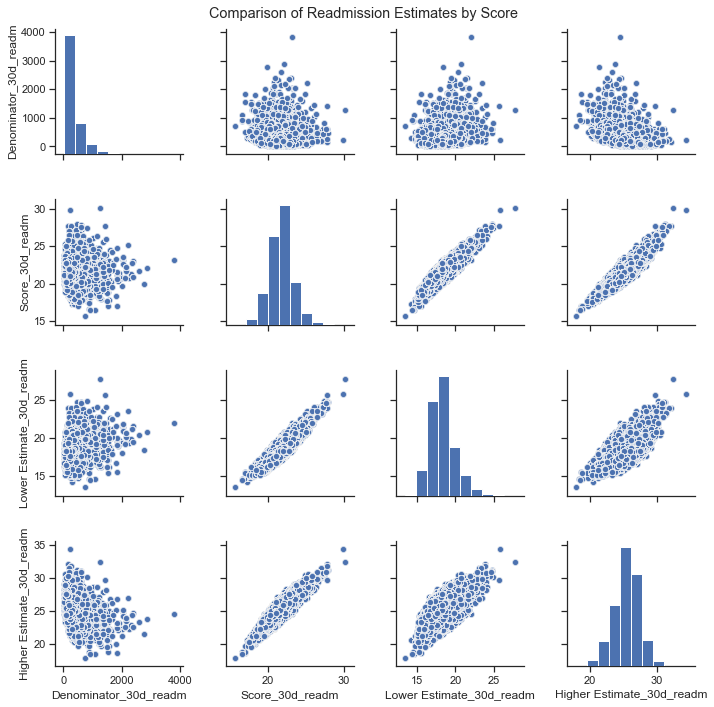

In [163]:
sns.set(style="ticks")

sns.pairplot(hosp_readmin_df[['Denominator_30d_readm', 'Score_30d_readm', 'Lower Estimate_30d_readm', 
                     'Higher Estimate_30d_readm']], 
            #hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Readmission Estimates by Score')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

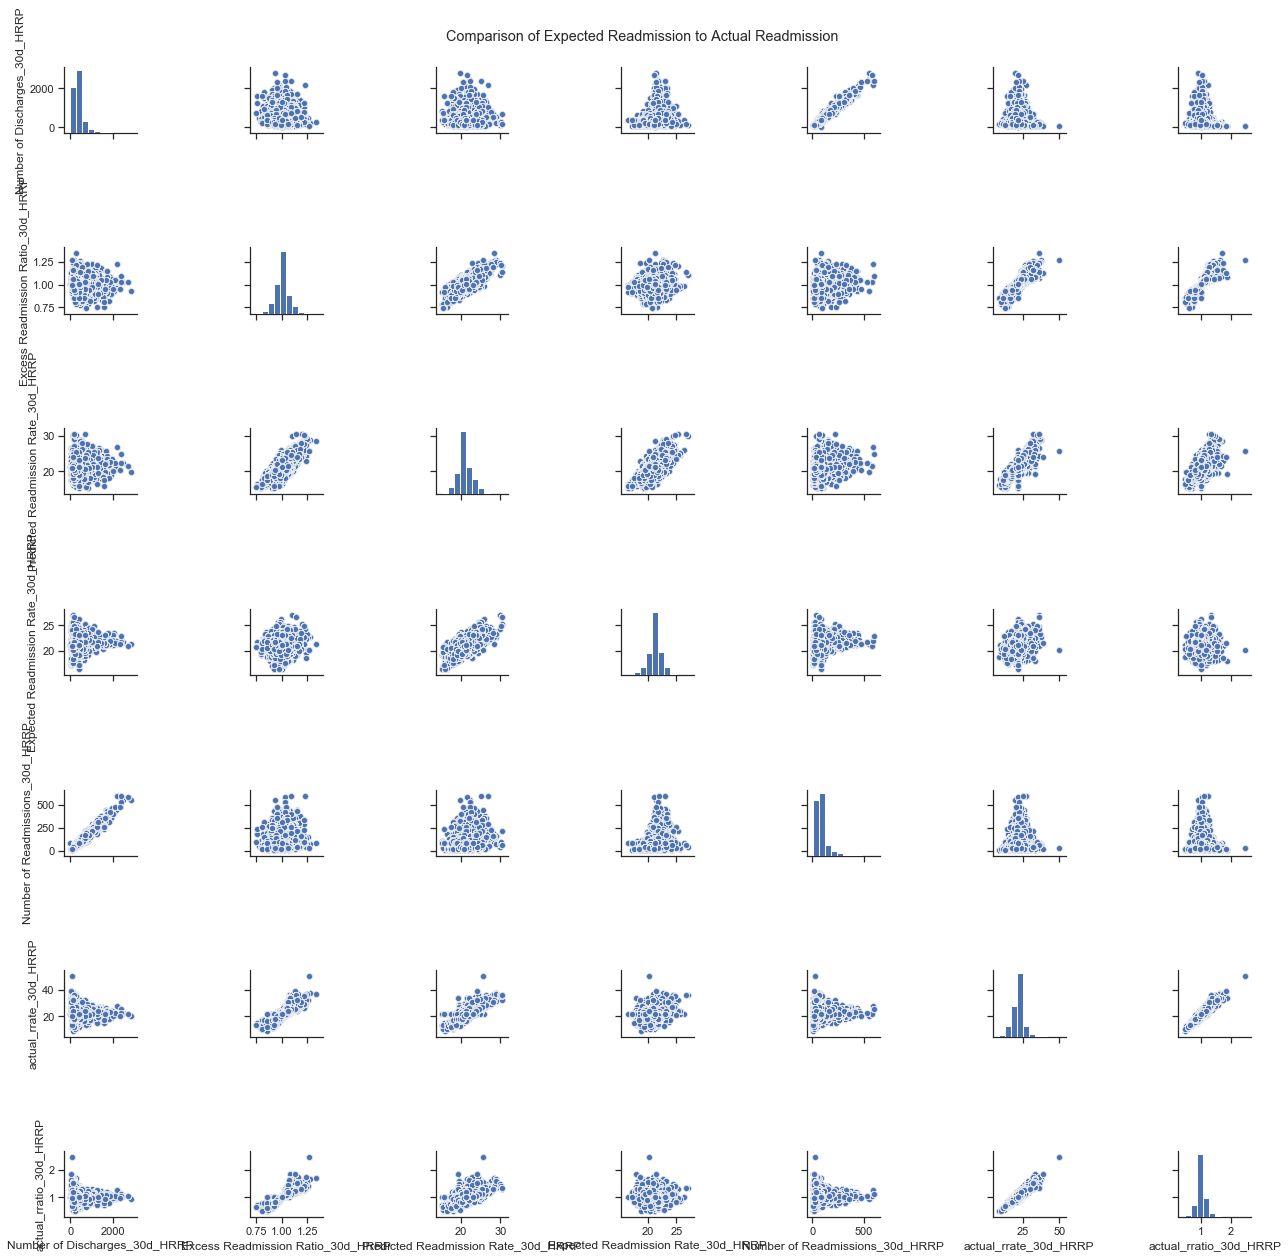

In [167]:
sns.set(style="ticks")

sns.pairplot(hosp_readmin_df[['Number of Discharges_30d_HRRP', 'Excess Readmission Ratio_30d_HRRP', 'Predicted Readmission Rate_30d_HRRP',
                     'Expected Readmission Rate_30d_HRRP', 'Number of Readmissions_30d_HRRP', 
                     'actual_rrate_30d_HRRP', 'actual_rratio_30d_HRRP']], 
            #hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Expected Readmission to Actual Readmission')
#plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style="ticks")

sns.pairplot(hosp_readmin_df[['Number of Discharges_30d_HRRP', 'Excess Readmission Ratio_30d_HRRP', 'Predicted Readmission Rate_30d_HRRP',
                     'Expected Readmission Rate_30d_HRRP', 'Number of Readmissions_30d_HRRP', 
                     'actual_rrate_30d_HRRP', 'actual_rratio_30d_HRRP']], 
            hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Expected Readmission to Actual Readmission by Geographical_classification')
plt.show()

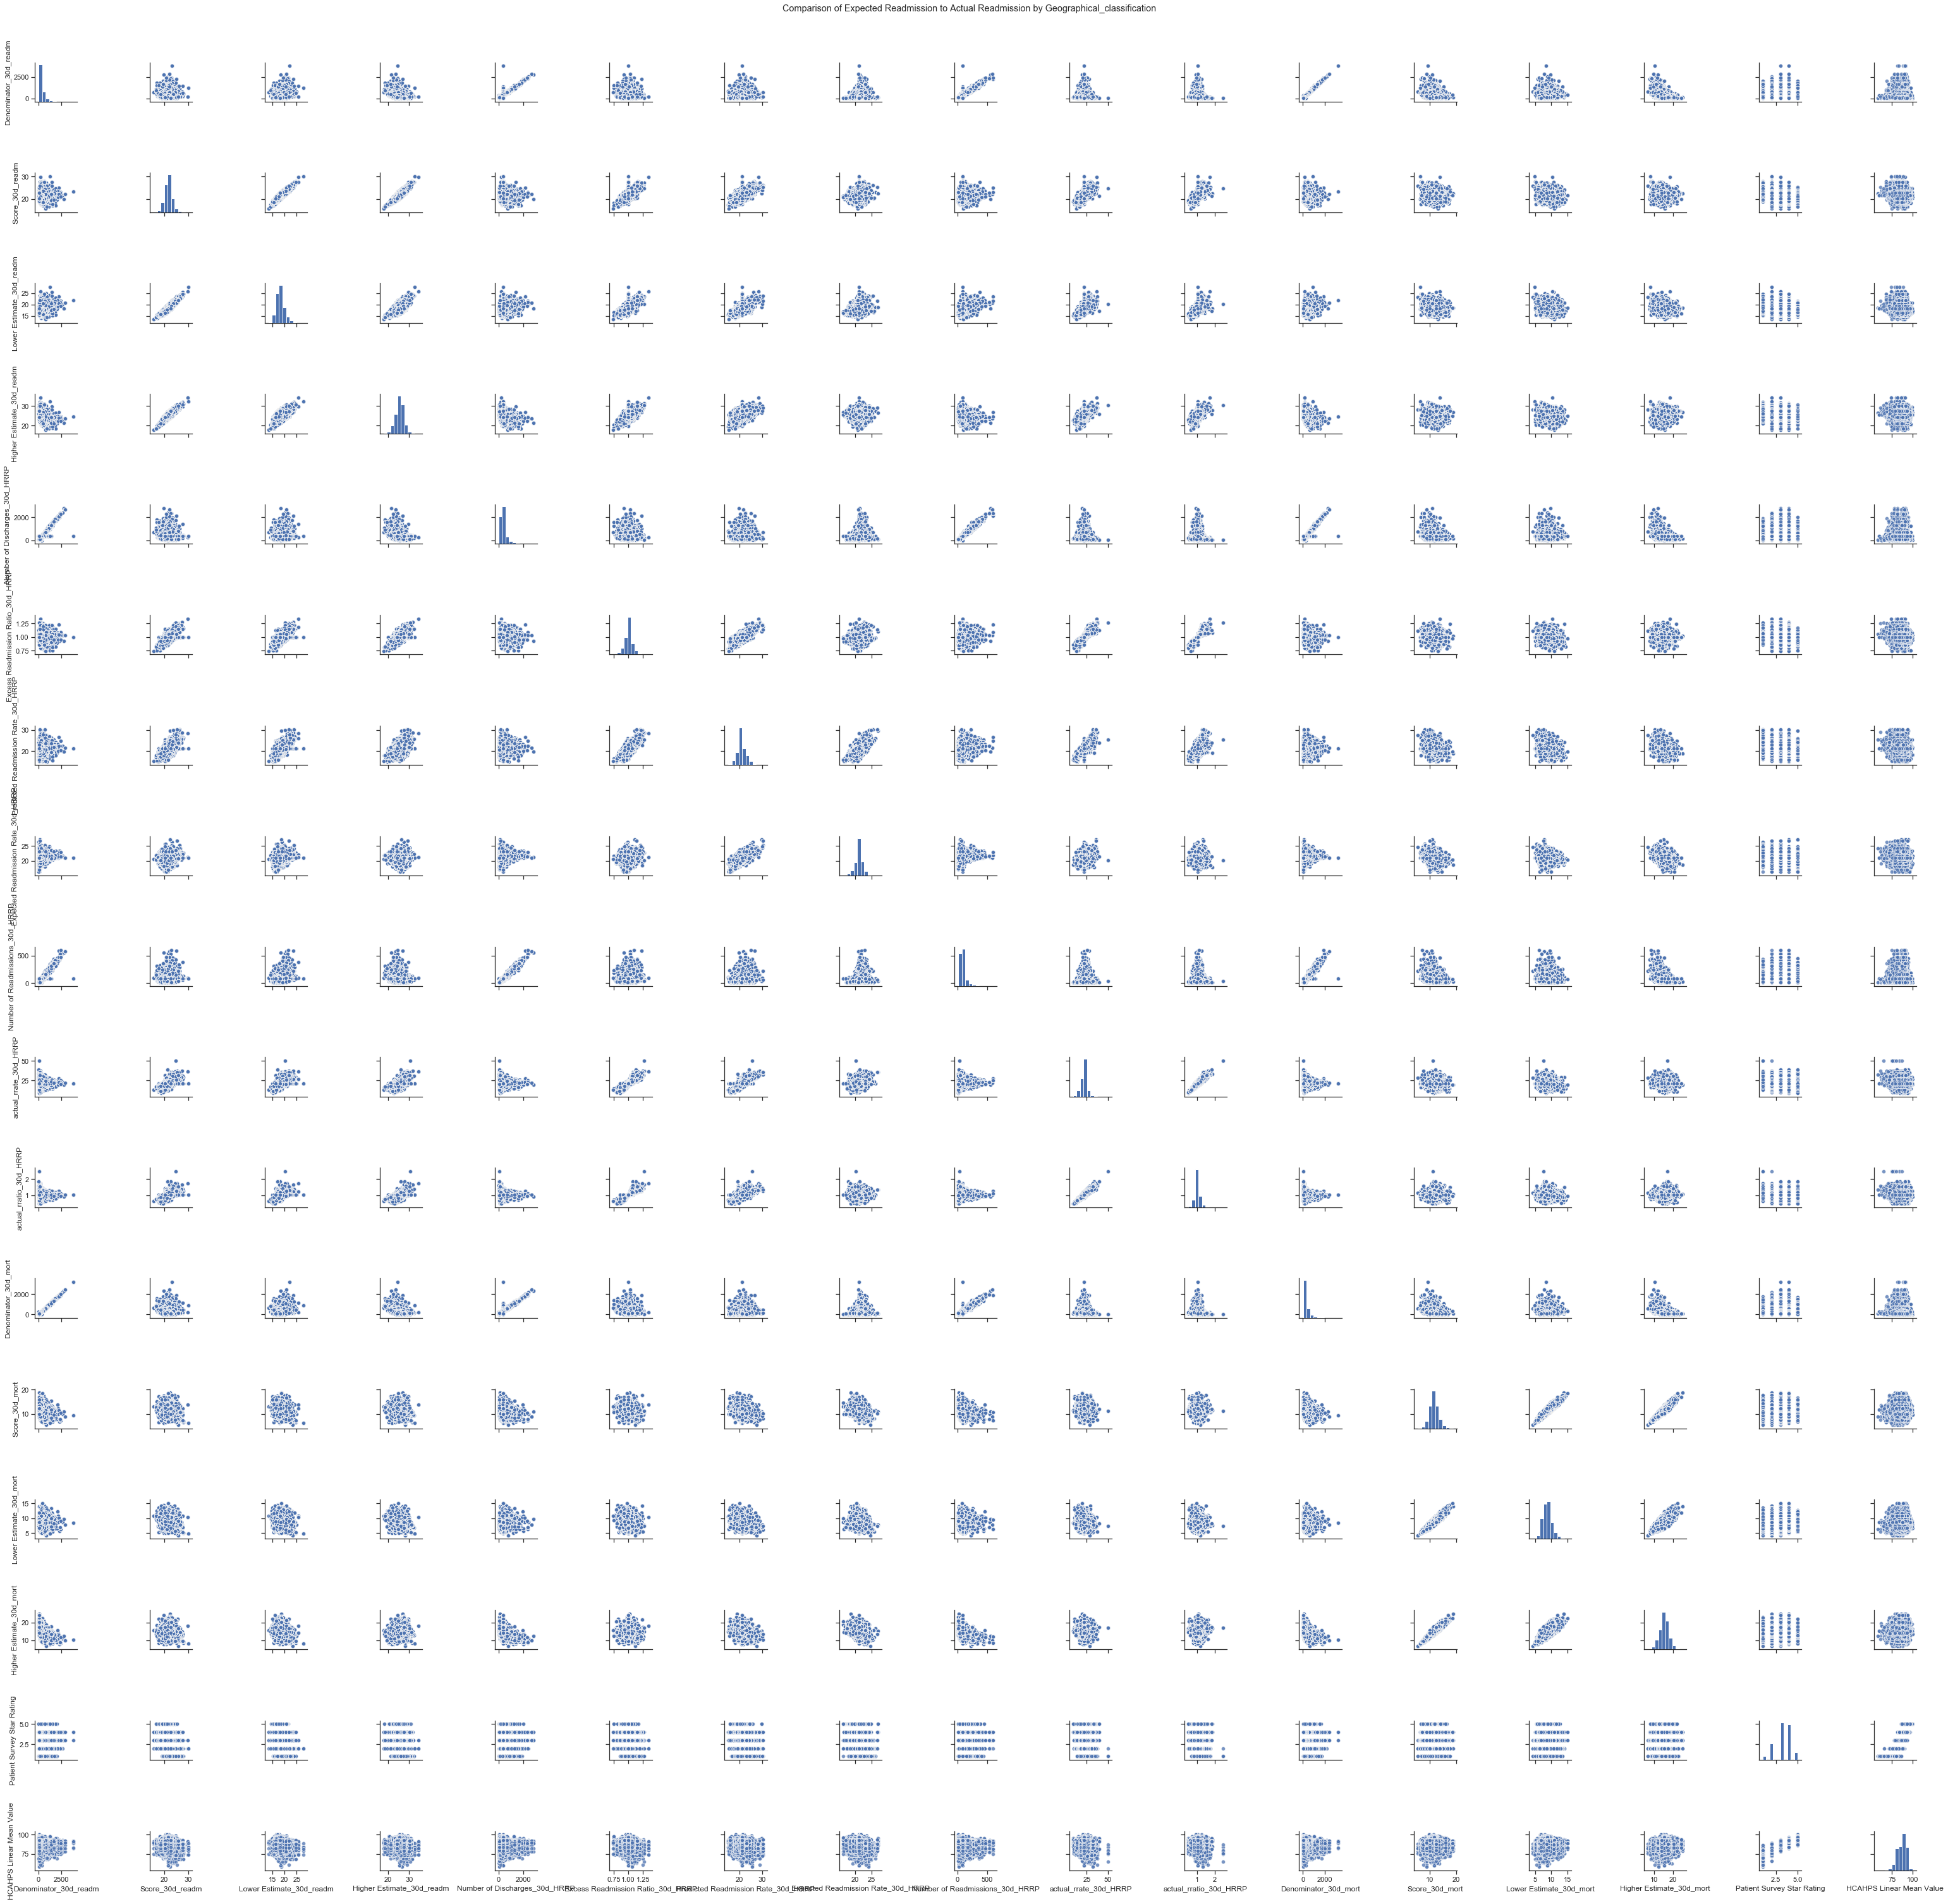

In [158]:
sns.set(style="ticks")

sns.pairplot(hosp_readmin_df[['Denominator_30d_readm', 'Score_30d_readm', 'Lower Estimate_30d_readm', 
                     'Higher Estimate_30d_readm', 'Number of Discharges_30d_HRRP', 
                     'Excess Readmission Ratio_30d_HRRP', 'Predicted Readmission Rate_30d_HRRP',
                     'Expected Readmission Rate_30d_HRRP', 'Number of Readmissions_30d_HRRP', 
                     'actual_rrate_30d_HRRP', 'actual_rratio_30d_HRRP', 'Denominator_30d_mort', 
                     'Score_30d_mort', 'Lower Estimate_30d_mort', 'Higher Estimate_30d_mort', 
                     'Patient Survey Star Rating', 'HCAHPS Linear Mean Value']], 
            #hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Expected Readmission to Actual Readmission by Geographical_classification')
plt.show()

In [ ]:
numerics_df = hosp_readmin_df.select_dtypes(include=[np.number])
numerics_df.head()

In [ ]:
#check 19_3
plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(houseprices_df.groupby(column)["saleprice"].mean().index, houseprices_df.groupby(column)["saleprice"].mean(),
           color=("grey","green"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
#print(df_readmin.loc[df_readmin['State'].isin('PA'))
df_readmin.loc[df_readmin['State'] == 'PA'].describe()                     
#hf_pa = df_readmin['State'] == 'PA


In [ ]:
df_readmin.groupby('Measure Name')['Excess Readmission Ratio'].describe()

In [ ]:
sns.catplot(x='measure', y='Excess Readmission Ratio', 
            data=df_readmin, kind = 'box')
plt.title('Plot: National Excess Readmission Ratio for HF')
plt.show()

In [ ]:
sns.catplot(x='Number of Readmissions', y='Number of Discharges', 
            hue = 'State', data=df_readmin)
plt.title('Plot 1: Number of Readmissions compared to Discharges by State')
plt.show()

In [ ]:
sns.lineplot(x='Number of Readmissions', y='Number of Discharges',
             hue = 'State',
            data = df_readmin)
plt.title('Plot 2: Number of Readmissions compared to Discharges by State')
plt.show()

In [ ]:
sns.relplot(x='Number of Discharges', y='Number of Readmissions',    
            legend='full', row = 'measure', hue = 'measure',data=df_readmin)
plt.subplots_adjust(top=0.95)
plt.suptitle('Plot Number of Readmissions compared to Discharges by Individual Measure')
plt.show()

In [ ]:
sns.catplot(x='measure', y='Excess Readmission Ratio', 
            data=df_readmin)
plt.title('Plot 1: Excess Readmission Ratio by Measure')
plt.show()

In [ ]:
p = sns.FacetGrid(df_readmin, row= 'measure')

p.map(plt.hist, 'Excess Readmission Ratio', color= "steelblue",  lw=0)
plt.subplots_adjust(top=0.9)
#p.set_axis_labels('')
plt.suptitle('Plot: Excess Readmission Ratio by Measure')

sns.despine(trim=True)
plt.show()

Scatter Matrix

When we want to explore relationships among many variables, a scattermatrix (also called a splom) is a great option:

In [ ]:
import plotly.figure_factory as fffigure = ff.create_scatterplotmatrix(
    df[['claps', 'publication', 'views',      
        'read_ratio','word_count']],
    diag='histogram',
    index='publication')